Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
None

Dataset Summary:
            Sales
count  365.000000
mean   198.454795
std     14.771009
min    156.000000
25%    188.000000
50%    198.000000
75%    208.000000
max    238.000000


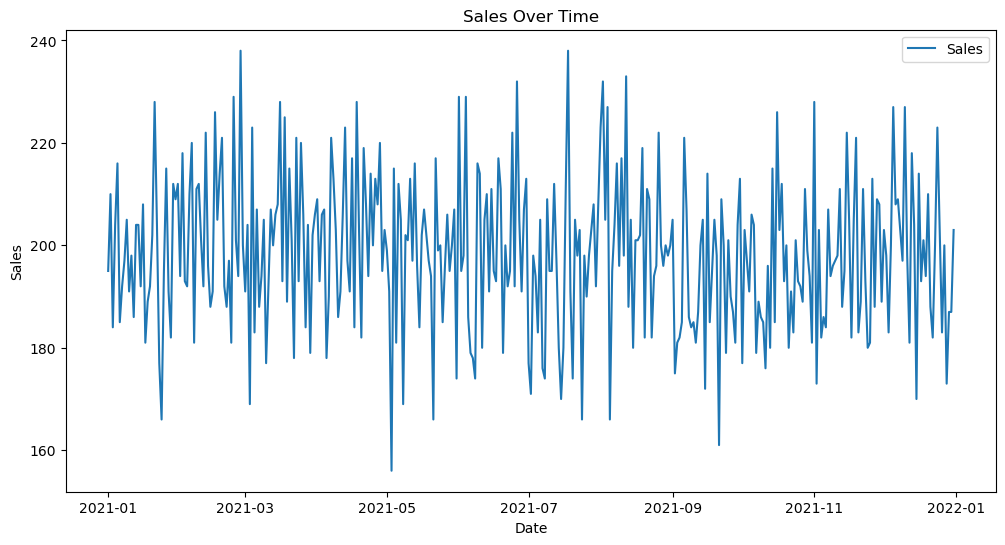

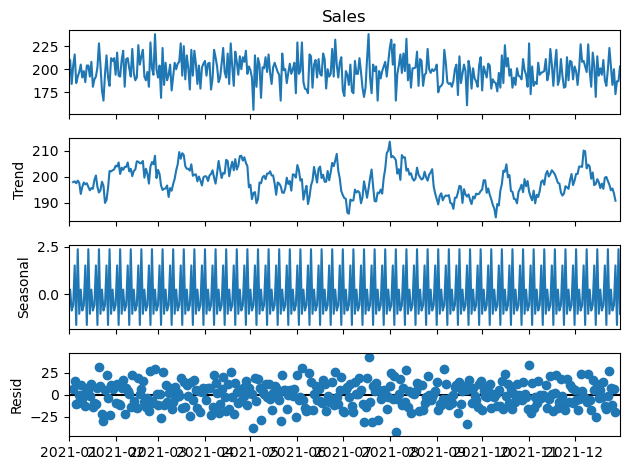


Training ARIMA Model...
Mean Squared Error: 234.36


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


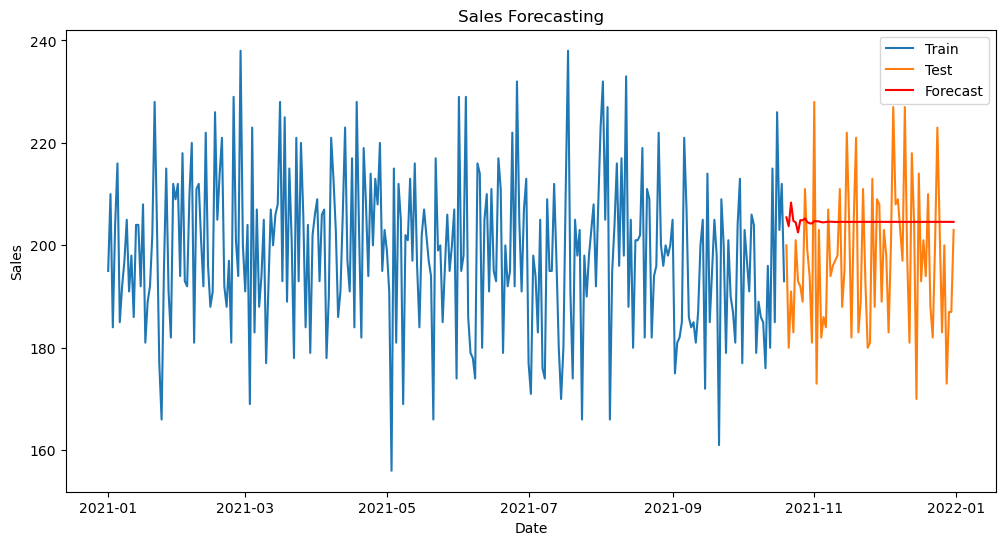

ARIMA Model and forecast visualization completed!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

data = pd.read_csv('sales_data.csv', parse_dates=['Date'], index_col='Date')

print("Initial Dataset Info:")
print(data.info())

data = data.fillna(method='ffill')

print("\nDataset Summary:")
print(data.describe())

plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(data['Sales'], model='additive')

decompose_result.plot()
plt.show()

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

print("\nTraining ARIMA Model...")
model = ARIMA(train['Sales'], order=(5, 1, 0))  # Adjust order as needed
arima_model = model.fit()

forecast = arima_model.forecast(steps=len(test))

mse = mean_squared_error(test['Sales'], forecast)
print(f"Mean Squared Error: {mse:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# saving the model
arima_model.save('arima_model.pkl')

print("ARIMA Model and forecast visualization completed!")
